In [1]:
# Script to graph the number of TIME for ranked enumeration
## first scenario

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import seaborn as sns
import os

In [56]:
alg_label = ["R. LOUDS Backtrack.", 
             "R. LOUDS Op. Order",
             "R. DFUDS Backtrack.", 
             "R. DFUDS Op. Order"]

In [67]:
# List of query patterns
patterns = ["j3","j4","p2","p3","p4","s3","t2","t3","t4","ti2","ti3"]
# Initialize an empty NumPy array
number_res = np.array([])

In [68]:
for pattern in patterns:
    number_results_file = np.loadtxt(f'../../query1000results/original/{pattern}-k1-v1000-number-res.txt')

    # Ensure it's an array (in case it loads as a scalar)
    number_results_file = np.atleast_1d(number_results_file)

    # Concatenate instead of element-wise addition
    number_res = np.concatenate((number_res, number_results_file))

In [69]:
len(number_res) # eje x

51

In [84]:
# Dictionary to store data
data = {}
#data["original"] = np.array([])
data["rankedLoudsBack"] = np.array([])
data["rankedLoudsNon"] = np.array([])
data["rankedDfudsBack"] = np.array([])
data["rankedDfudsNon"] = np.array([])


for type_fun in [0]:#,1]:
    for k in [1]: 
        for i,query in enumerate(patterns): 
            file = f"{query}-f{type_fun}-k{k}-v1000-time.txt"
            file_original = f"{query}-k100000000-v1000-time.txt"
            
            original = np.loadtxt(f'../../query1000results/original/{file_original}', dtype=float)

            original = np.atleast_1d(original)
            
            rankedLoudsBack = np.loadtxt(f'../../query1000results/ranked/louds/backtracking/{file}', dtype=float)
            rankedLoudsBack = np.atleast_1d(rankedLoudsBack)
            rankedLoudsNon = np.loadtxt(f'../../query1000results/ranked/louds/optimalOrder/{file}', dtype=float)
            rankedLoudsNon = np.atleast_1d(rankedLoudsNon) 
            rankedDfudsBack = np.loadtxt(f'../../query1000results/ranked/dfuds/backtracking/{file}', dtype=float)
            rankedDfudsBack = np.atleast_1d(rankedDfudsBack) 
            rankedDfudsNon = np.loadtxt(f'../../query1000results/ranked/dfuds/optimalOrder/{file}', dtype=float)
            rankedDfudsNon = np.atleast_1d(rankedDfudsNon) 
            
            #data["original"]=np.concatenate((data["original"], original))
            data["rankedLoudsBack"] = np.concatenate((data["rankedLoudsBack"], rankedLoudsBack/original))
            data["rankedLoudsNon"] = np.concatenate((data["rankedLoudsNon"], rankedLoudsNon/original))
            data["rankedDfudsBack"] = np.concatenate((data["rankedDfudsBack"], rankedDfudsBack/original))
            data["rankedDfudsNon"] = np.concatenate((data["rankedDfudsNon"], rankedDfudsNon/original))
            
        

In [121]:
len(data["rankedLoudsBack"])

51

In [122]:
len(data["rankedLoudsNon"])

51

In [123]:
len(data["rankedDfudsBack"])

51

In [124]:
len(data["rankedDfudsNon"])

51

In [86]:
original

array([1.73120e+00, 1.84454e+01, 2.60000e-05, 1.60000e-05])

In [87]:
rankedLoudsBack / original

array([5.90965804e+00, 8.11963958e+00, 1.14825000e+06, 1.23586250e+04])

In [88]:
colors = ['dodgerblue', 'darkturquoise', 'mediumspringgreen', 'lime']

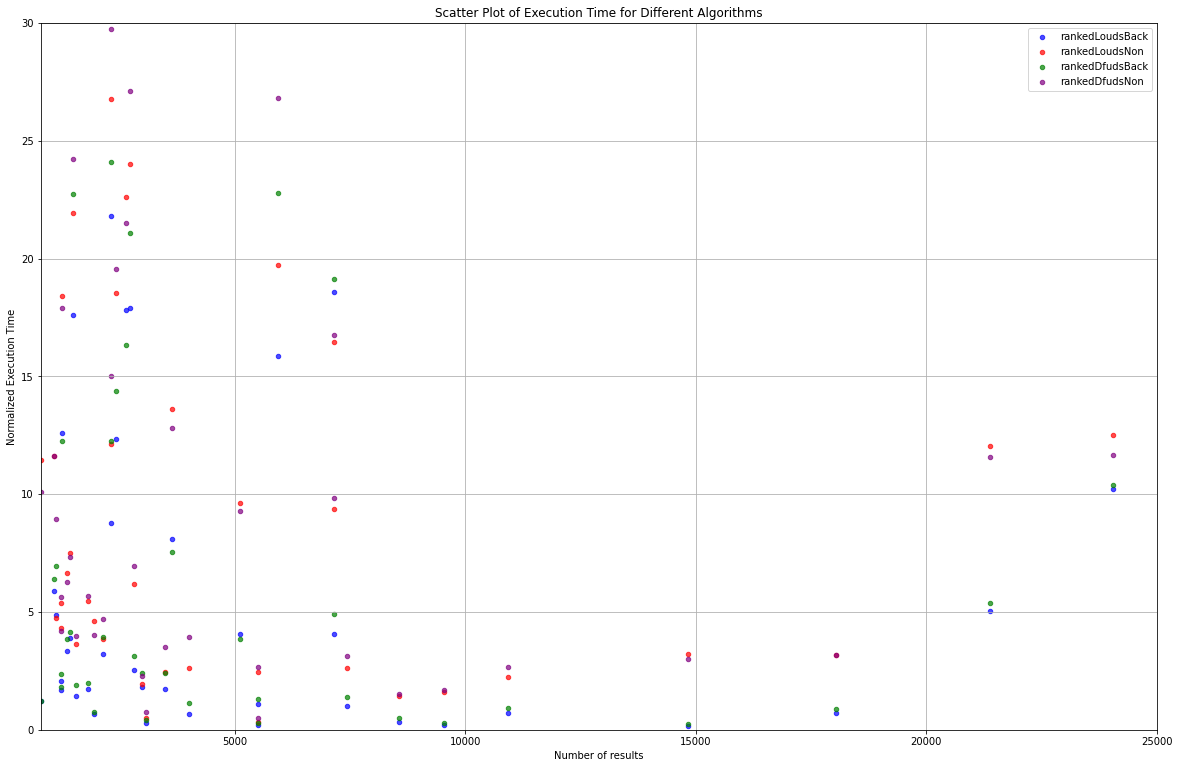

In [126]:


colors = {
    #"original": 'dodgerblue',
    "rankedLoudsBack": "blue",
    "rankedLoudsNon": "red",
    "rankedDfudsBack": "green",
    "rankedDfudsNon": "purple"
}

# Create the scatter plot
plt.figure(figsize=(20, 13))

# Plot each algorithm with its corresponding color
for algo, values in data.items():
    plt.scatter(number_res, values, label=algo, color=colors[algo], alpha=0.7, s=20)

#plt.xlim(800,600000)
plt.xlim(800,25000)
plt.ylim(0,30)
# Labels and title
plt.xlabel("Number of results")
plt.ylabel("Normalized Execution Time")
plt.title("Scatter Plot of Execution Time for Different Algorithms")
plt.legend()
plt.grid(True)

plt.savefig('/Users/asugomez/Documentos/Magister/Tesis/tesisQdags/imagenes/scatter_plot_ranked-time.pdf')

# Show the plot
plt.show()

In [58]:
## table